In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.io import loadmat

In [288]:
a = loadmat('./datos/21-4-7/20210407-0009/20210407-0009_01.mat')
tira = a['A']
tiempos = np.arange(0,0.5-a['Tinterval'][0][0],a['Tinterval'][0][0])

In [289]:
tiempos_cortado = tiempos[::3]
tira_cortado = tira[::3,0]

<IPython.core.display.Javascript object>


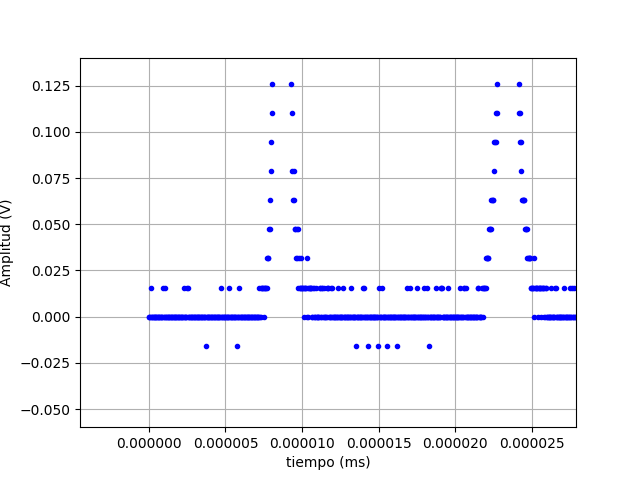

In [290]:
i = 0
f = 5000
plt.plot(tiempos_cortado[i:f],tira_cortado[i:f],'.b')
plt.xlabel('tiempo (ms)')
plt.ylabel('Amplitud (V)')
plt.grid()

In [291]:
inf = tira_cortado != np.inf
count_inf = np.sum(tira_cortado == np.inf)
slices = tira_cortado[inf] > 0.01

In [292]:
filtrado_V = tira_cortado[slices]/np.max(tira_cortado[slices])
filtrado_t = tiempos_cortado[slices]

In [293]:
peaks, _ = find_peaks(filtrado_V, distance = 60, height=0.05)
#peaks, _ = find_peaks(filtrado_V, distance = 60, height=50)
maximos_V = filtrado_V[peaks]
maximos_t = filtrado_t[peaks]

<IPython.core.display.Javascript object>


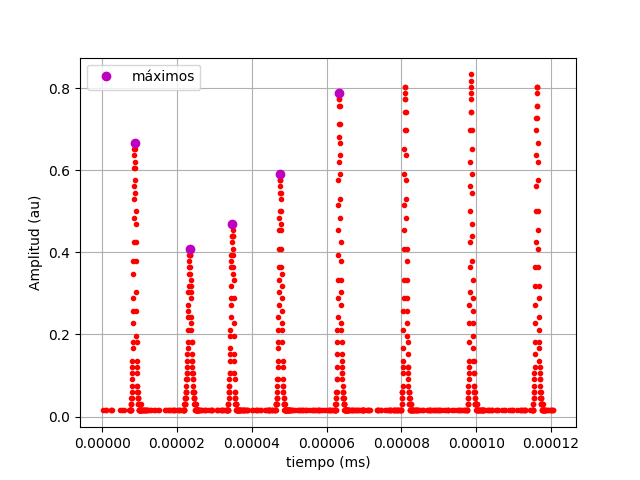

In [296]:
i = 0
f = 1000
im = 0
fm = 5
plt.plot(filtrado_t[i:f],filtrado_V[i:f],'.r')
plt.plot(maximos_t[im:fm],maximos_V[im:fm],'om', label='máximos')
plt.xlabel('tiempo (ms)')
plt.ylabel('Amplitud (au)')
plt.legend()
plt.grid()

In [299]:
i=np.arange(0,len(filtrado_t)/50,5000)
for j in range(len(i)):
    inicio=int(i[j])
    final=int(i[j+1])
    peaks, _ = find_peaks(filtrado_V[inicio:final], distance = 60, height=0.05)
    maximos_V = filtrado_V[inicio:final][peaks]
    maximos_t = filtrado_t[inicio:final][peaks]
    plt.plot(filtrado_t[inicio:final],filtrado_V[inicio:final],'.r')
    plt.plot(maximos_t,maximos_V,'*m', label='máximos')
    plt.xlabel('tiempo (ms)')
    plt.ylabel('Amplitud (au)')
    plt.legend()
    plt.grid()
    plt.savefig(f'pedazo{j}')
    plt.clf()

<IPython.core.display.Javascript object>

IndexError: index 15 is out of bounds for axis 0 with size 15

In [268]:
i

array([    0.,  5000., 10000., 15000., 20000., 25000.])